# Basic examples of usage of GeoImage, GeoImageTilers

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [203]:
import os 

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from GeoImage import GeoImage
from GeoImageTilers import GeoImageTiler, GeoImageTilerConstSize
from create_synthetic_images import create

In [124]:
def display(img, **kwargs):
    plt.figure(figsize=(12, 4))
    plt.imshow(img[:,:,:3], interpolation='none')
    plt.colorbar(orientation='horizontal')

## GeoImage examples
### Create a synthetic image

In [125]:
test_image = create(100, 120, 5, 'test_image.tif', depth=2)

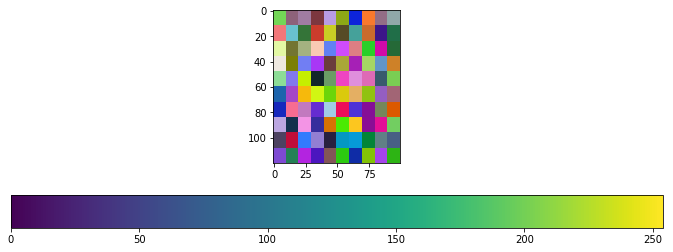

In [126]:
display(test_image)

### Open it with GeoImage and print basic information

- Image shape
- geo projection string 
- geographic extent in WGS84
- metadata
- some other functions from gdal dataset

In [135]:
gimg = GeoImage('test_image.tif')

gimg.shape, gimg.projection, gimg.geo_extent, gimg.metadata, gimg.get_dataset().GetDescription(), gimg.get_dataset().GetGeoTransform()

((120, 100, 5),
 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]',
 array([[ 13.60746033,  50.25013288],
        [ 13.70646033,  50.25013288],
        [ 13.70646033,  50.13113288],
        [ 13.60746033,  50.13113288]]),
 {'AREA_OR_POINT': 'Area',
  'IMAGE_STRUCTURE__INTERLEAVE': 'PIXEL',
  'TEST0': '0',
  'TEST1': '123',
  'TEST2': 'abc'},
 'test_image.tif',
 (13.60746033, 0.001, 0.0, 50.25013288, 0.0, -0.001))

### Get image data
- Whole image
- Part of the image without rescaling
- Part of the image with rescaling

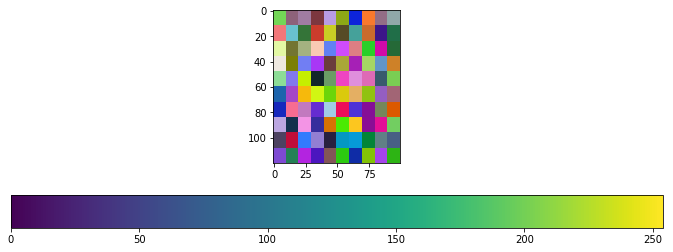

In [128]:
np_img = gimg.get_data(dtype=np.float)
np_img.dtype, np_img.shape
display(np_img)

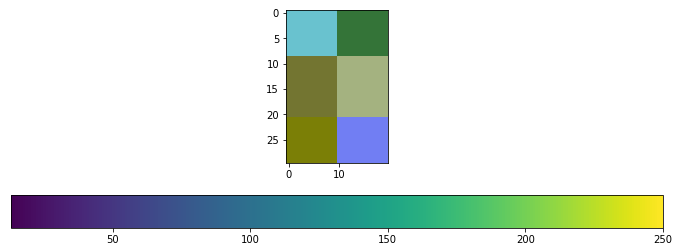

In [129]:
display(gimg.get_data([10, 15, 20, 30], dtype=np.float))

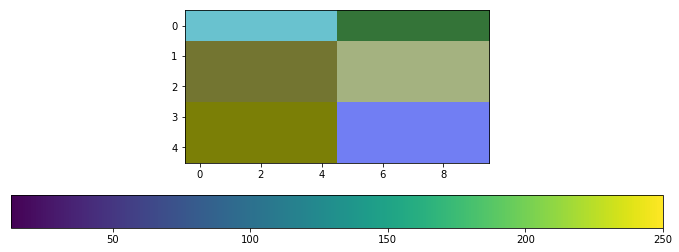

In [130]:
display(gimg.get_data([10, 15, 20, 30], dst_width=10, dst_height=5, dtype=np.float))

## GeoImageTilers examples

### GeoImageTiler : iterator over tiles of GeoImage

1. Add `nodata` values, constant tile size and overlapping

(70L, 70L, 5L) float64 -1.0 250.0 -15.0 -15.0
(70L, 70L, 5L) float64 -1.0 250.0 40.0 -15.0
(70L, 70L, 5L) float64 -1.0 229.0 95.0 -15.0
(70L, 70L, 5L) float64 -1.0 253.0 -15.0 40.0
(70L, 70L, 5L) float64 -1.0 254.0 40.0 40.0
(70L, 70L, 5L) float64 -1.0 236.0 95.0 40.0
(70L, 70L, 5L) float64 -1.0 253.0 -15.0 95.0
(70L, 70L, 5L) float64 -1.0 254.0 40.0 95.0
(70L, 70L, 5L) float64 -1.0 236.0 95.0 95.0


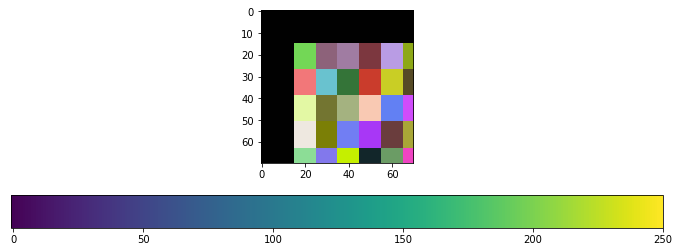

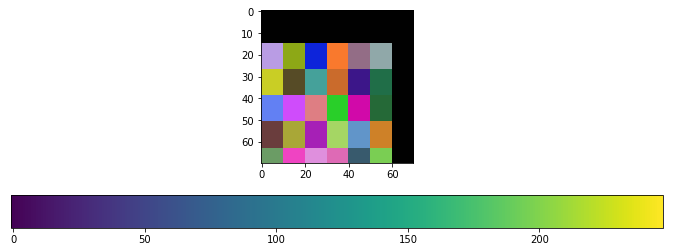

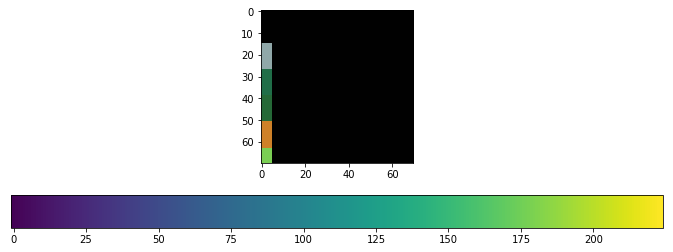

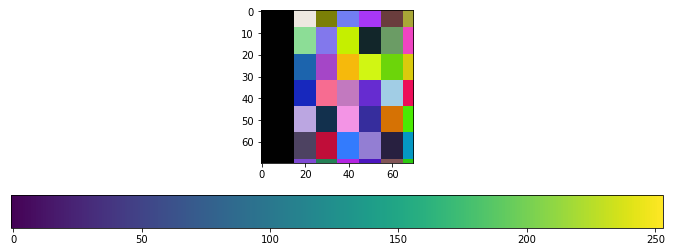

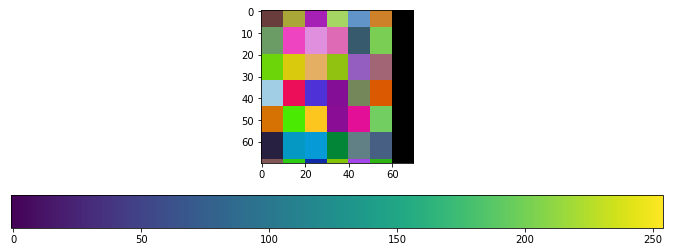

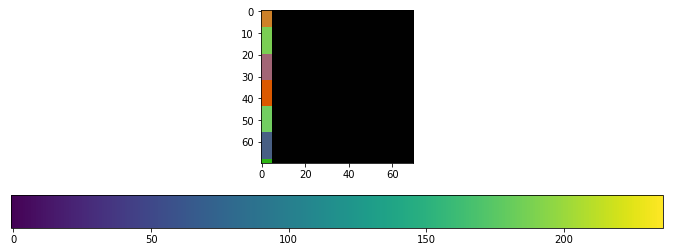

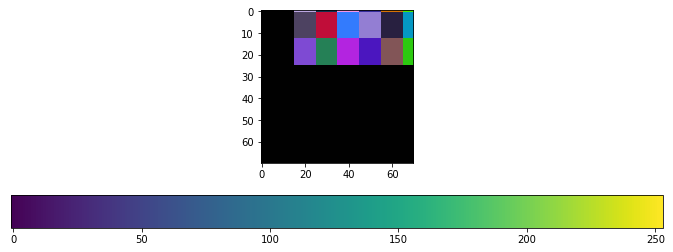

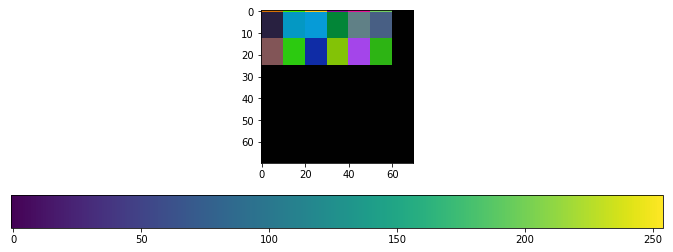

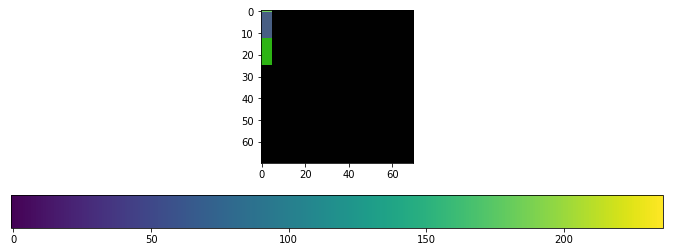

In [138]:
tiles = GeoImageTiler(gimg, tile_size=(70, 70), overlapping=15, include_nodata=True, nodata_value=-1.0)
for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    display(tile)

(55L, 55L, 5L) float64 0.0 250.0 0.0 0.0
(55L, 60L, 5L) float64 5.0 250.0 40.0 0.0
(55L, 5L, 5L) float64 17.0 229.0 95.0 0.0
(70L, 55L, 5L) float64 0.0 253.0 0.0 40.0
(70L, 60L, 5L) float64 0.0 254.0 40.0 40.0
(70L, 5L, 5L) float64 0.0 236.0 95.0 40.0
(25L, 55L, 5L) float64 3.0 253.0 0.0 95.0
(25L, 60L, 5L) float64 4.0 254.0 40.0 95.0
(25L, 5L, 5L) float64 50.0 236.0 95.0 95.0


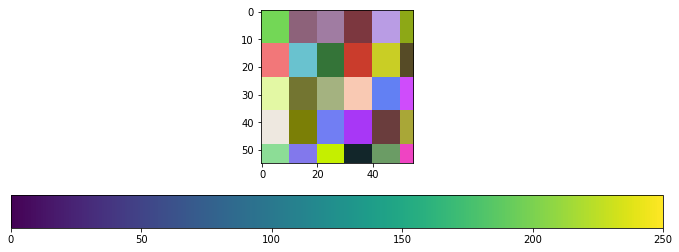

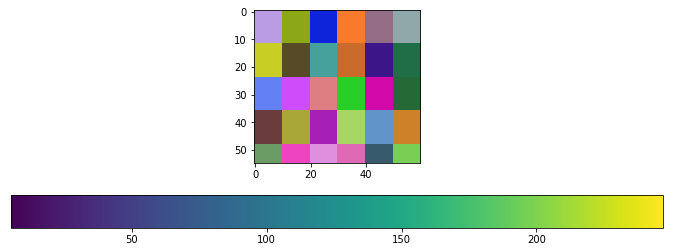

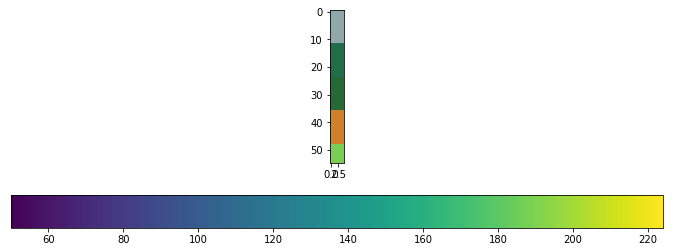

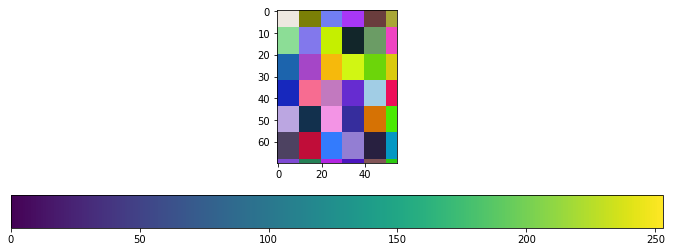

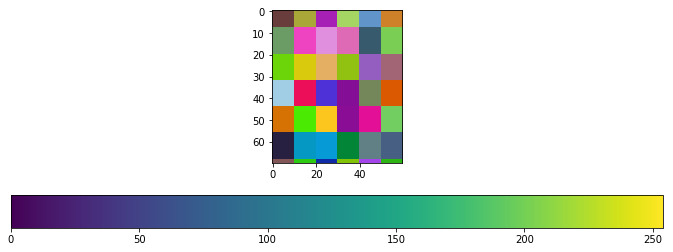

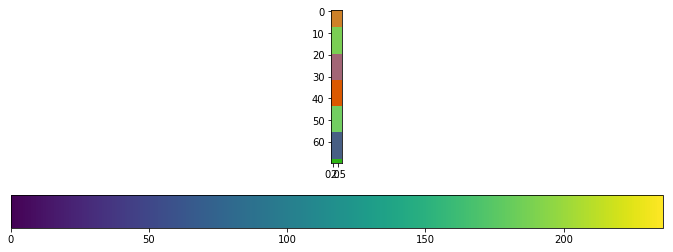

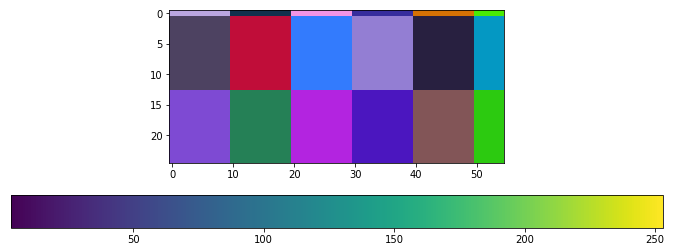

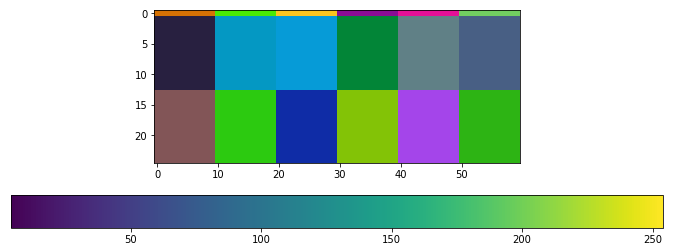

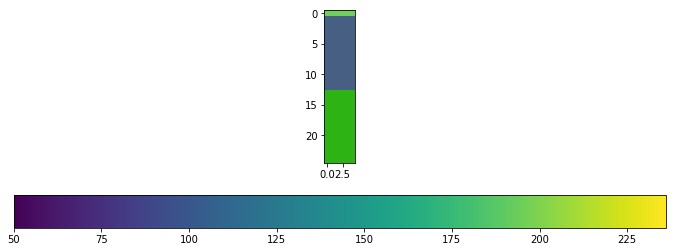

In [192]:
tiles = GeoImageTiler(gimg, tile_size=(70, 70), overlapping=15, include_nodata=False, nodata_value=-1.0)
for tile, xoffset, yoffset in tiles:
    print tile.shape, tile.dtype, tile.min(), tile.max(), xoffset, yoffset
    display(tile)

In [204]:
tiles = GeoImageTiler(gimg, tile_size=(30, 30), overlapping=0, include_nodata=False, scale=1.5, nodata_value=0.0)
tiles.nx, tiles.ny

(3, 3)

(30L, 30L, 5L) 0 0
(30L, 30L, 5L) 45 0
(30L, 7L, 5L) 90 0
(30L, 30L, 5L) 0 45
(30L, 30L, 5L) 45 45
(30L, 7L, 5L) 90 45
(20L, 30L, 5L) 0 90
(20L, 30L, 5L) 45 90
(20L, 7L, 5L) 90 90


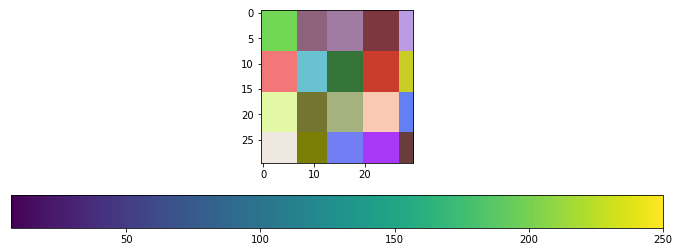

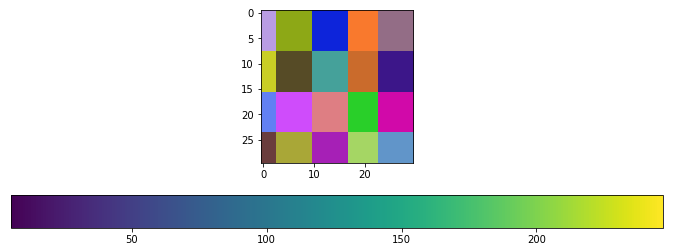

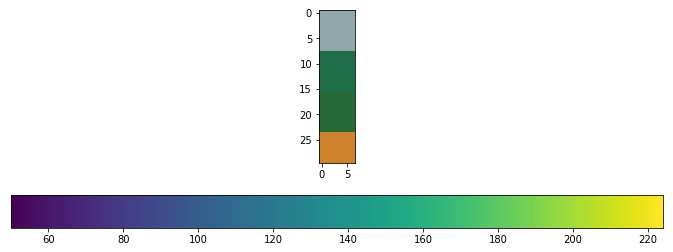

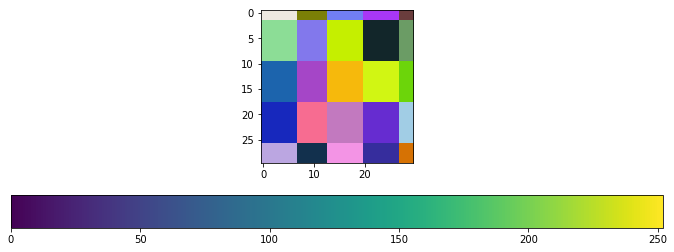

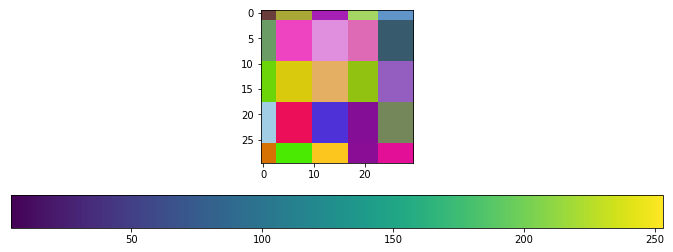

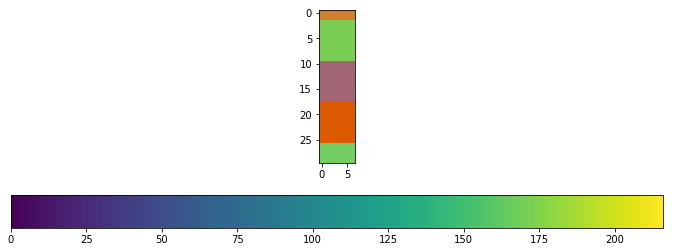

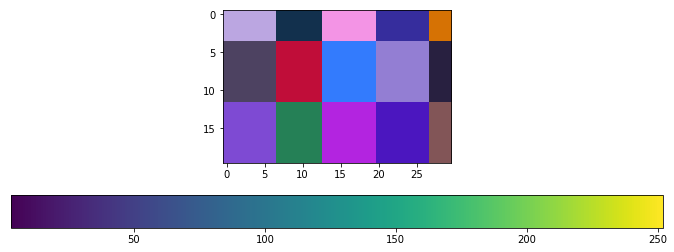

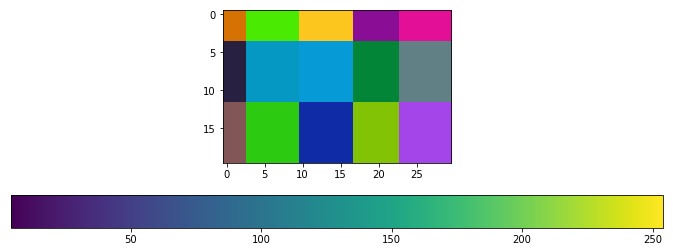

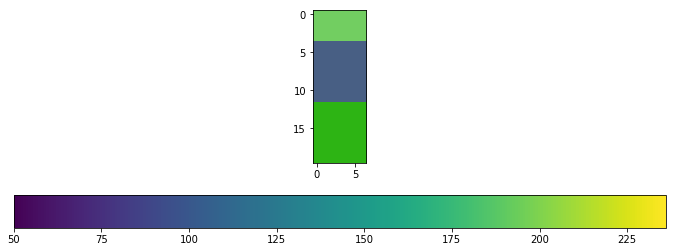

In [205]:

for tile, xoffset, yoffset in tiles:
    print tile.shape, xoffset, yoffset
    display(tile)

In [ ]:
from unittest import TestCase